**Data Loading and exploration**

First, load the glioma dataset and perform initial exploration:

In [20]:
import pandas as pd
df = pd.read_csv("/Users/renqingcuomao/Desktop/glioma-grading-project/data/TCGA_InfoWithGrade.csv") # load the data into a pandas DataFrame
print(df.shape) # how many rows and columns
df.head() # display the first few rows of the DataFrame

(839, 24)


,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.30,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.72,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.17,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.78,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.51,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 1. feature types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Grade             839 non-null    int64  
 1   Gender            839 non-null    int64  
 2   Age_at_diagnosis  839 non-null    float64
 3   Race              839 non-null    int64  
 4   IDH1              839 non-null    int64  
 5   TP53              839 non-null    int64  
 6   ATRX              839 non-null    int64  
 7   PTEN              839 non-null    int64  
 8   EGFR              839 non-null    int64  
 9   CIC               839 non-null    int64  
 10  MUC16             839 non-null    int64  
 11  PIK3CA            839 non-null    int64  
 12  NF1               839 non-null    int64  
 13  PIK3R1            839 non-null    int64  
 14  FUBP1             839 non-null    int64  
 15  RB1               839 non-null    int64  
 16  NOTCH1            839 non-null    int64  
 1

In [3]:
df['Gender'].unique()
df['Race'].value_counts()
df['Grade'].unique()

array([0, 1])

So this double-check means that the categorical features in the dataset (TCGA_InfoWithGrade.csv) have been already encoded as numeric codes, ready for logistic regression or other ML models, and no need for label encoding or one-hot encoding

In [4]:
# 2. missing values
df.isnull().sum()

Grade               0
Gender              0
Age_at_diagnosis    0
Race                0
IDH1                0
TP53                0
ATRX                0
PTEN                0
EGFR                0
CIC                 0
MUC16               0
PIK3CA              0
NF1                 0
PIK3R1              0
FUBP1               0
RB1                 0
NOTCH1              0
BCOR                0
CSMD3               0
SMARCA4             0
GRIN2A              0
IDH2                0
FAT4                0
PDGFRA              0
dtype: int64

In [ ]:
# 3. class balance (examine the distribution of the target variable (0=LGG, 1=GBM))
df['Grade'].value_counts()

Grade
0    487
1    352
Name: count, dtype: int64

In [6]:
# 4. basic statistics
df.describe()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,...,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,0.419547,0.418355,50.935411,0.107271,0.481526,0.414779,0.258641,0.168057,0.133492,0.132300,...,0.053635,0.047676,0.045292,0.034565,0.032181,0.032181,0.032181,0.027414,0.027414,0.026222
std,0.493779,0.493583,15.702339,0.369392,0.499957,0.492978,0.438149,0.374140,0.340309,0.339019,...,0.225431,0.213206,0.208068,0.182784,0.176586,0.176586,0.176586,0.163383,0.163383,0.159889
min,0.000000,0.000000,14.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,38.055000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,51.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,62.800000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,89.290000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# 5. target correlations (q quick check of the relationship between the target variable and some features)
pd.crosstab(df['IDH1'], df['Grade'])

Grade,0,1
IDH1,,
0,106,329
1,381,23


**Data Preprocessing Pipeline**

Before modeling, se up a preprocessing pipleline to handel data prepration consistently:

1. categorical encoding: the preprocessed file (TCGA_InfoWithGrade.csv) encodes Gender and Race as numeric codes, but remember that Race codes 0/1/2/3 are nominal categories (White, Black or African American, Asian, American Indian/Alaska Native), not ordinal. So it's safer to one-hot encode the Race feature so that the model doesn't assume an ordinal relationship beweetn these codes. Gender and Mutation features can be left as 0/1 directly.

2. feature scaling: logstic regression is a lineaer model, and it does not require features to be on the same scale for correctness; however, if we use regularization, feature scaling is important so that the penalty is applied evenly across coefficients. The only continuous feature here is Age_at_diagnosis (in years). It’s good practice to standardize this (subtract mean, divide by std) so that age is on a comparable scale to the 0/1 features. This prevents age (with a range of decades) from dominating the gradient updates or regularization just due to scale.

In [28]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define column subsets
numeric_features = ["Age_at_diagnosis"]
onehot_features = ["Race"]  # multi-class categorical to one-hot
# (Gender and gene mutation features will remain as passed through)

preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),
    # add handle_unknown='ignore' to avoid errors with unseen categories during transformation
    (OneHotEncoder(drop='first', handle_unknown='ignore'), onehot_features),
    remainder='passthrough'
)

This preporcessor will output a transformered feature matrix where:
- Age is replaced by a standardized age.
- Race is replaced by three one-hot columns (since drop='first' will drop one category as baseline to avoid multicollinearity)
- Gender and other 20 mutation columns are unchanged (0/1 values)

Next, seperate the features and the target:

In [29]:
X = df.drop("Grade", axis=1)
y = df["Grade"].values

In [30]:
# Fit the preprocessor on the data to obtain feature names
preprocessor.fit(X)
feature_names = preprocessor.get_feature_names_out()
print(feature_names)

['standardscaler__Age_at_diagnosis' 'onehotencoder__Race_1'
 'onehotencoder__Race_2' 'onehotencoder__Race_3' 'remainder__Gender'
 'remainder__IDH1' 'remainder__TP53' 'remainder__ATRX' 'remainder__PTEN'
 'remainder__EGFR' 'remainder__CIC' 'remainder__MUC16' 'remainder__PIK3CA'
 'remainder__NF1' 'remainder__PIK3R1' 'remainder__FUBP1' 'remainder__RB1'
 'remainder__NOTCH1' 'remainder__BCOR' 'remainder__CSMD3'
 'remainder__SMARCA4' 'remainder__GRIN2A' 'remainder__IDH2'
 'remainder__FAT4' 'remainder__PDGFRA']


This lists the new feature names including the one-hot encoded race dummy columns (eg., Race_1, Race_2, Race_3 for the three non-baseline race categories) and all other original features. This is useful later when interpreting coefficients.

**Important:** we have no missing values and all features are already numeric after encoding, so we don't need imputation and complex scaling for binary features, the pipeline above is sufficient, and now we move on to modeling.

**Logistic Regression Modeling**

Logstic Regression will be our primary model to classify glioma grade (LGG vs GBM). We will run experiments with both unregualried and regularied logistic regression to **compare performance and interpretability**. We will also use cross-validation for robust evaluation, as recommended (the dataset suggests using 10-fold cross-validation for calssification tasks)

* Baseline Logstic Regression (without regularization)

First, consider logistic regression without any regularization(penalty). This focuses on fitting the data as closely as possible and will give a sense of maximum performance and the raw coefficients.

In scikit-learn, by default, logisticRegression includes an L2 penalty. We can disablle reguarizaition by setting `penalty='none'`. Alternatively, one can use a very large C value to approximate no regularization (since C is the inverse of regularization strength). Here, we will explicitly set no penalty.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Logistic regression with no regularization
logreg_no_reg = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)

pipeline_no_reg = Pipeline([
    ('prep', preprocessor),
    ('clf', logreg_no_reg)
])

Now, evaluate this model with cross-validation. We’ll do a stratified 10-fold CV:

In [32]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Accuracy via cross_val_score as an example
acc_scores = cross_val_score(pipeline_no_reg, X, y, cv=cv, scoring='accuracy')
print(f"Accuracy (10-fold CV) = {acc_scores.mean():.3f} ± {acc_scores.std():.3f}")

# We can also compute other metrics using cross_val_score or cross_val_predict
prec_scores = cross_val_score(pipeline_no_reg, X, y, cv=cv, scoring='precision')
rec_scores = cross_val_score(pipeline_no_reg, X, y, cv=cv, scoring='recall')
auc_scores  = cross_val_score(pipeline_no_reg, X, y, cv=cv, scoring='roc_auc')
print(f"Precision (CV mean) = {prec_scores.mean():.3f}")
print(f"Recall (CV mean)    = {rec_scores.mean():.3f}")
print(f"AUC (CV mean)       = {auc_scores.mean():.3f}")

/Users/renqingcuomao/Desktop/glioma-grading-project/appliedbio_venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/renqingcuomao/Desktop/glioma-grading-project/appliedbio_venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Accuracy (10-fold CV) = 0.869 ± 0.029
Precision (CV mean) = 0.816
Recall (CV mean)    = 0.895
AUC (CV mean)       = 0.918


/Users/renqingcuomao/Desktop/glioma-grading-project/appliedbio_venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/renqingcuomao/Desktop/glioma-grading-project/appliedbio_venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


* Regularized Logistic Regression (L2 and L1 Penalties)

Regularization can improve generalization and also help interpret which features are truly important by shrinking less useful coefficients:

**L2 (Ridge) regularization**: Adds a penalty proportional to the square of coefficients. This tends to shrink coefficients towards zero but rarely exactly zero. It’s useful to avoid overfitting, especially when many features might be only weakly predictive. We’ll use the default penalty='l2' (which is scikit-learn’s default) for a comparison model.

**L1 (Lasso) regularization**: Adds a penalty proportional to the absolute value of coefficients. This can force some coefficients to become exactly zero, effectively performing feature selection. Logistic regression with L1 is a way to select a sparse set of features that matter most. In scikit-learn, use penalty='l1' with a solver that supports it (e.g., liblinear or saga).

We’ll create pipelines for both and compare. We should also consider tuning the regularization strength C (the inverse of penalty term λ). A smaller C means stronger regularization. We might try a reasonable default like C=1.0 first, and later we could tune C via cross-validation if needed.

In [33]:
# L2-regularized logistic regression
logreg_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
pipeline_l2 = Pipeline([
    ('prep', preprocessor),
    ('clf', logreg_l2)
])

# L1-regularized logistic regression
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
pipeline_l1 = Pipeline([
    ('prep', preprocessor),
    ('clf', logreg_l1)
])

Now evaluate with cross-validation similarly:

In [34]:
print("L2-regularized Logistic Regression:")
print("Accuracy (CV):", cross_val_score(pipeline_l2, X, y, cv=cv, scoring='accuracy').mean())
print("AUC (CV):", cross_val_score(pipeline_l2, X, y, cv=cv, scoring='roc_auc').mean())

print("L1-regularized Logistic Regression:")
print("Accuracy (CV):", cross_val_score(pipeline_l1, X, y, cv=cv, scoring='accuracy').mean())
print("AUC (CV):", cross_val_score(pipeline_l1, X, y, cv=cv, scoring='roc_auc').mean())

L2-regularized Logistic Regression:
Accuracy (CV): 0.8700803212851405
AUC (CV): 0.9199311966850232
L1-regularized Logistic Regression:


/Users/renqingcuomao/Desktop/glioma-grading-project/appliedbio_venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/renqingcuomao/Desktop/glioma-grading-project/appliedbio_venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/renqingcuomao/Desktop/glioma-grading-project/appliedbio_venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Accuracy (CV): 0.8736660929432013
AUC (CV): 0.9206804070834682


/Users/renqingcuomao/Desktop/glioma-grading-project/appliedbio_venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [35]:
pipeline_l1.fit(X, y)  # fit on entire data
# Get coefficients from the inner logistic model
coeffs = pipeline_l1.named_steps['clf'].coef_[0]
feature_names = pipeline_l1.named_steps['prep'].get_feature_names_out()
# Pair each feature name with its coefficient
coef_df = pd.DataFrame({
    "feature": feature_names,
    "coef": coeffs
}).sort_values("coef", key=abs, ascending=False)
print(coef_df.head(10))
print("Non-zero coefficients:", (coeffs != 0).sum(), "out of", len(coeffs))

                             feature      coef
5                    remainder__IDH1 -3.732278
17                 remainder__NOTCH1 -2.551294
22                   remainder__IDH2 -2.530551
21                 remainder__GRIN2A  1.133977
6                    remainder__TP53  0.979267
14                 remainder__PIK3R1  0.844023
13                    remainder__NF1 -0.758734
10                    remainder__CIC -0.625008
0   standardscaler__Age_at_diagnosis  0.624846
8                    remainder__PTEN  0.620400
Non-zero coefficients: 19 out of 25


**Feature Selection Techniques**

In [37]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2

onehot_features = ["Race"]

preprocessor_chi2 = make_column_transformer(
    (OneHotEncoder(drop='first', handle_unknown='ignore'), onehot_features),
    remainder='passthrough'  # Gender, Age, gene mutations remain
)

# Apply preprocessing
X_chi2 = preprocessor_chi2.fit_transform(X)

# chi2 requires all features to be non-negative, so Age must be ≥ 0
# Confirm there's no negative value
import numpy as np
print(np.min(X_chi2))  # should be ≥ 0

# Select top 5 features
selector = SelectKBest(chi2, k=5)
selector.fit(X_chi2, y)

# Get top feature names
feature_names = preprocessor_chi2.get_feature_names_out()
top_indices = selector.get_support(indices=True)
top_features = feature_names[top_indices]
print("Top 5 features by chi-squared:", top_features)

0.0
Top 5 features by chi-squared: ['remainder__Age_at_diagnosis' 'remainder__IDH1' 'remainder__ATRX'
 'remainder__PTEN' 'remainder__CIC']


In [38]:
from sklearn.feature_selection import RFECV

# Use logistic regression with L2 penalty for stability in RFE
rfe_estimator = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
rfecv = RFECV(estimator=rfe_estimator, cv=5, scoring='accuracy', n_jobs=-1)
X_prepped = preprocessor.fit_transform(X)  # get numpy array of features
rfecv.fit(X_prepped, y)
print("Optimal number of features:", rfecv.n_features_)
sel_indices = rfecv.support_  # boolean mask of selected features
print("Selected features:", preprocessor.get_feature_names_out()[sel_indices])

Optimal number of features: 23
Selected features: ['standardscaler__Age_at_diagnosis' 'onehotencoder__Race_1'
 'onehotencoder__Race_2' 'onehotencoder__Race_3' 'remainder__Gender'
 'remainder__IDH1' 'remainder__TP53' 'remainder__PTEN' 'remainder__EGFR'
 'remainder__CIC' 'remainder__MUC16' 'remainder__PIK3CA' 'remainder__NF1'
 'remainder__PIK3R1' 'remainder__FUBP1' 'remainder__RB1'
 'remainder__NOTCH1' 'remainder__CSMD3' 'remainder__SMARCA4'
 'remainder__GRIN2A' 'remainder__IDH2' 'remainder__FAT4'
 'remainder__PDGFRA']


In [39]:
# Suppose rfecv.support_ gives mask of selected features
selected_cols = preprocessor.get_feature_names_out()[rfecv.support_]
# We can construct a smaller preprocessor that only uses these columns:
# (One way: make a dataframe with selected columns from X_prepped, but easier is to modify pipeline)

**Model evaluation and validation**

In [40]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred_cv = cross_val_predict(pipeline_no_reg, X, y, cv=cv)
cm = confusion_matrix(y, y_pred_cv, labels=[0, 1])
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[414  73]
 [ 37 315]]


/Users/renqingcuomao/Desktop/glioma-grading-project/appliedbio_venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


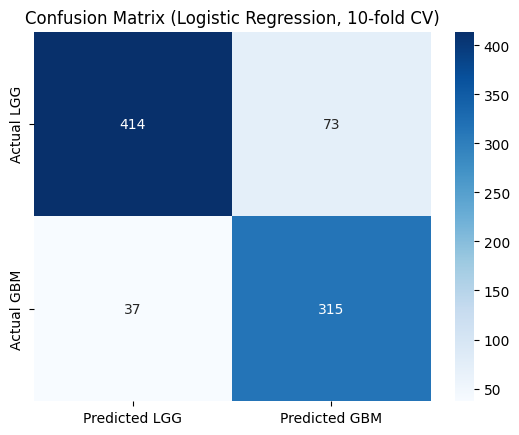

<Figure size 640x480 with 0 Axes>

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Predicted LGG","Predicted GBM"],
            yticklabels=["Actual LGG","Actual GBM"])
plt.title("Confusion Matrix (Logistic Regression, 10-fold CV)")
plt.show()
plt.savefig("confusion.pdf") 


/Users/renqingcuomao/Desktop/glioma-grading-project/appliedbio_venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


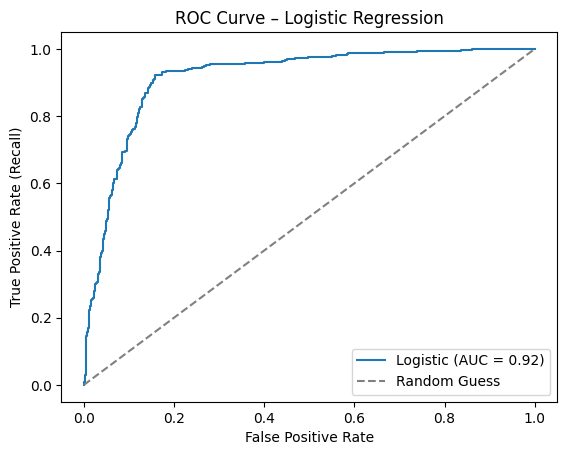

<Figure size 640x480 with 0 Axes>

In [45]:
from sklearn.metrics import roc_curve, auc

y_prob_cv = cross_val_predict(pipeline_no_reg, X, y, cv=cv, method="predict_proba")[:,1]
fpr, tpr, thresholds = roc_curve(y, y_prob_cv)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"Logistic (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],'--', color='grey', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve – Logistic Regression")
plt.legend()
plt.show()
plt.savefig("roc.pdf") 
